# 前言
本章学习 Seaborn 包绘图(统计绘图).
> [原文链接](https://mp.weixin.qq.com/s/AU-IEEQvmBxBZ7GBZIZwBA?client=tim&ADUIN=2263352064&ADSESSION=1557476235&ADTAG=CLIENT.QQ.5603_.0&ADPUBNO=26882) [官网链接](http://seaborn.pydata.org)

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

np.random.seed(1031)

In [2]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

color = ['#dc2624', '#2b4750', '#45a0a2', '#e87a59',
        '#7dcaa9', '#649E7D', '#dc8018', '#C89F91',
        '#6c6d6c', '#4f6268', '#c7cccf']

# 设置调色板
sns.set_palette(color)

+ 第一章: 深度了解配对图(pairplot)
+ 第二章: 广度链接其他类型图

# 1 深度了解 Seaborn
## 1.1 鸢尾花识别

|种类|测量的数据|
|-|-|
|山鸢花(Iris Setosa)|萼片长度(sepal length)、萼片宽度(sepal width)、花瓣长度(petal length)、花瓣宽度(petal width)|
|变色鸢花(Iris Versicolor)|萼片长度(sepal length)、萼片宽度(sepal width)、花瓣长度(petal length)、花瓣宽度(petal width)|
|维吉尼亚鸢尾(Iris Virginica)|萼片长度(sepal length)、萼片宽度(sepal width)、花瓣长度(petal length)、花瓣宽度(petal width)|

应用机器学习模型前需要对数据进行清理.

数据处理:
+ 检查数据
+ 清理数据
+ 测试数据

### 检查数据
检查数据的必要性: 获取的数据极有可能不是干净的数据, 所以要对数据进行检查.

想做什么: 利用所给数据给鸢尾花的种类进行分类. 分类前需要对数据进行清理.

数据清理的三个问题:
+ 数据格式有无问题
+ 数据数值有无问题
+ 数据需要修复或删除么?

#### <div style="border: 1px solid #2e82ff; background: #dc2624;">检查点 1. 数据格式</div> 

In [3]:
iris_data = pd.read_csv('data for seaborn/iris-data.csv',
                       na_values=['NA']) # 空缺值用 NaN 替代

In [4]:
# 查看前 10 行数据
iris_data.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


#### <div style="border: 1px solid #2e82ff; background: #dc2624;">检查点 2. 数据统计</div> 

从数据汇总开始.

In [5]:
# 数据描述性统计
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


将枯燥的数据进行可视化, 需要注意的是要仔细辨别绘制后的图形, 
不能停留在「哇, 这图好炫酷啊!」, 图是用来说明问题的,
当然在说明问题的基础之上若是绘制得美观一点就更好了.

ValueError: `dataset` input should have multiple elements.

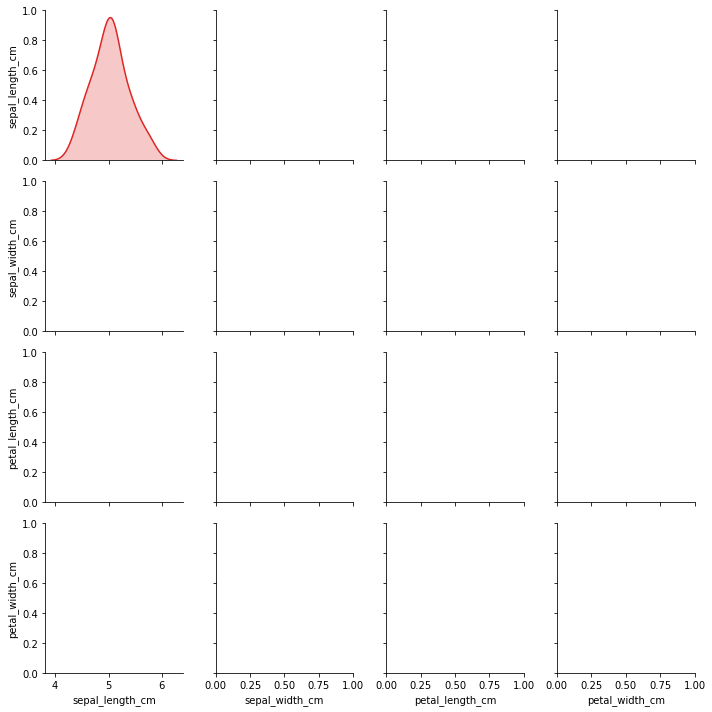

In [6]:
# 配对图
sns.pairplot(iris_data.dropna(), hue='class')

#### <div style="border: 1px solid #2e82ff; background: #dc2624;">修正点 1. 数据类别</div> 

In [7]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

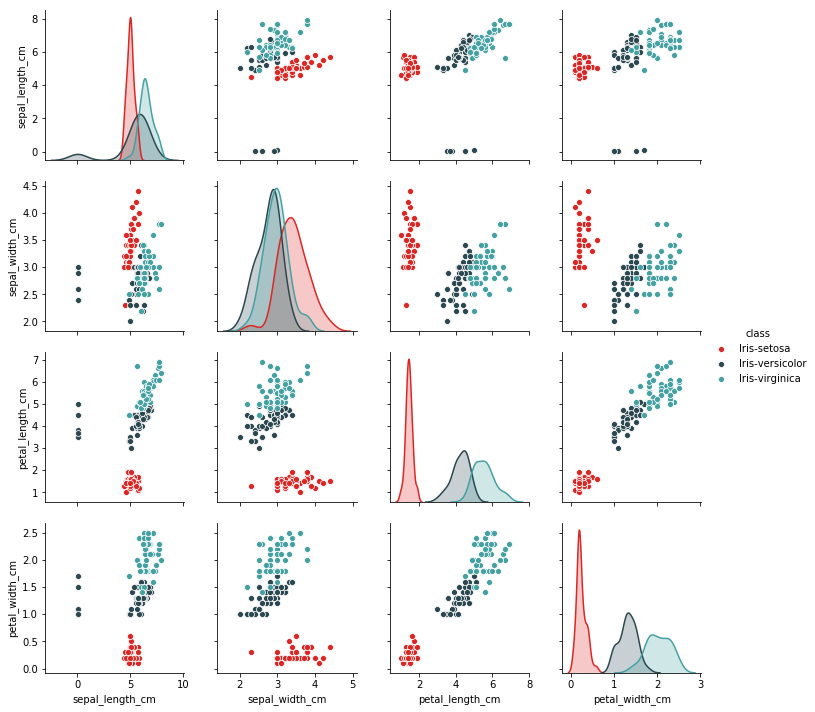

In [8]:
sns.pairplot(iris_data.dropna(), hue='class')

#### <div style="border: 1px solid #2e82ff; background: #dc2624;">修正点 2. 异常值</div> 


山鸢尾的长度不低于 2.5cm, 因此上图绘制有错误, 即要检查异常值.

数据量很少可以直接删除数据, 如果很多则需要检查原因.

$\fbox{问题 1: 山鸢尾花的一个宽度值落在了正常的范围之外}$

In [9]:
cond = (iris_data['class'] == 'Iris-setosa') & (iris_data['sepal_width_cm'] < 2.5)
    
iris_data.loc[cond] # 逻辑访问

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


发现错误的数据只有一条, 因此可以直接删除此数据

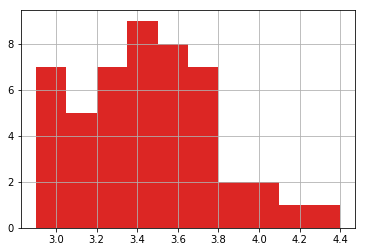

In [10]:
iris_data = iris_data.loc[~cond]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

$\fbox{问题 2: 变色鸢尾花的几个萼片长度值接近于零}$ 

先清洗数据, 否则会 GIGO (Garbage In Garbage Out).


In [11]:
cond = (iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)
iris_data.loc[cond]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


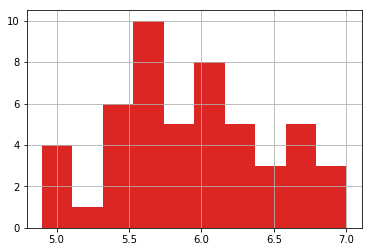

In [12]:
# 转换
iris_data.loc[cond, 'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

#### <div style="border: 1px solid #2e82ff; background: #dc2624;">修正点 3. 缺失值</div>

处理办法
+ 删除(deletion)
+ 插补(impulation)

iris_data[A].isnull() 找出 A 列中 值为 NA 或 NaN 的行

In [13]:
# 查看缺失值的位置
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
             (iris_data['sepal_width_cm'].isnull()) |
             (iris_data['petal_length_cm'].isnull()) |
             (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


求出平均值并替代缺失值

In [14]:
isSetosa = iris_data['class'] == 'Iris-setosa'

average_petal_width = iris_data.loc[isSetosa, 'petal_width_cm'].mean()

iris_data.loc[isSetosa & (iris_data['petal_width_cm'].isnull()),
             'petal_width_cm'] = average_petal_width

iris_data.loc[isSetosa & (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


<div style="border: 1px solid #2e82ff; background: #dc2624;"> 注意单词的拼写! </div>


再来看看对否没有缺失值了

In [15]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
             (iris_data['sepal_width_cm'].isnull()) |
             (iris_data['petal_length_cm'].isnull()) |
             (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


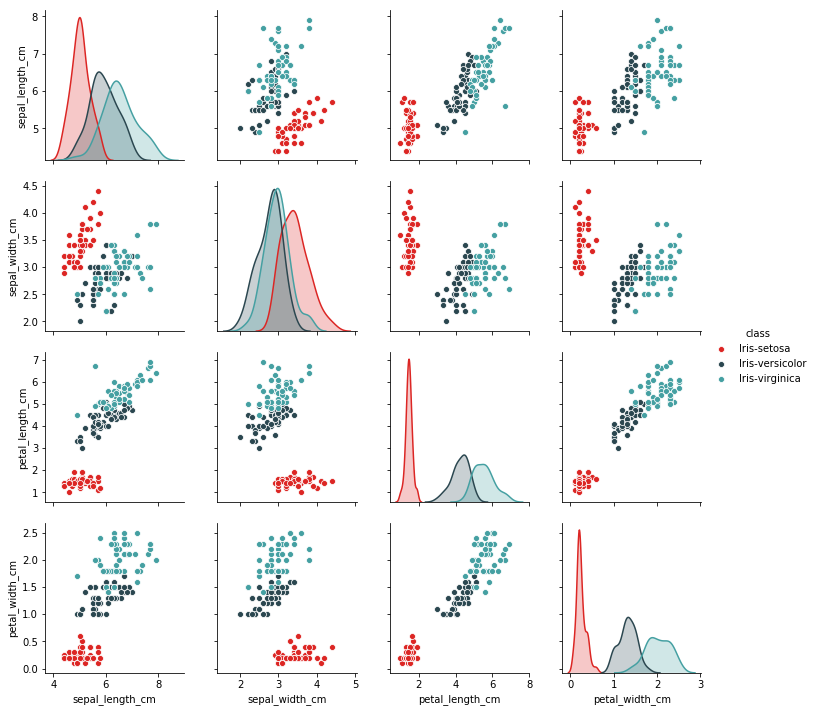

In [16]:
# 看看修正了类别、异常值后的干净数据是什么样的吧
sns.pairplot(iris_data, hue='class')

可以自定义配色:
+ set_style() 的五种风格: darkgrid, whitegrid, dark, ticks
+ set_palette() 的六种调色盘: deep, muted, pastel, bright, dark, colorblind

In [17]:
# 风格初始化
sns.set(style='ticks')

## 1.2 无标签的图

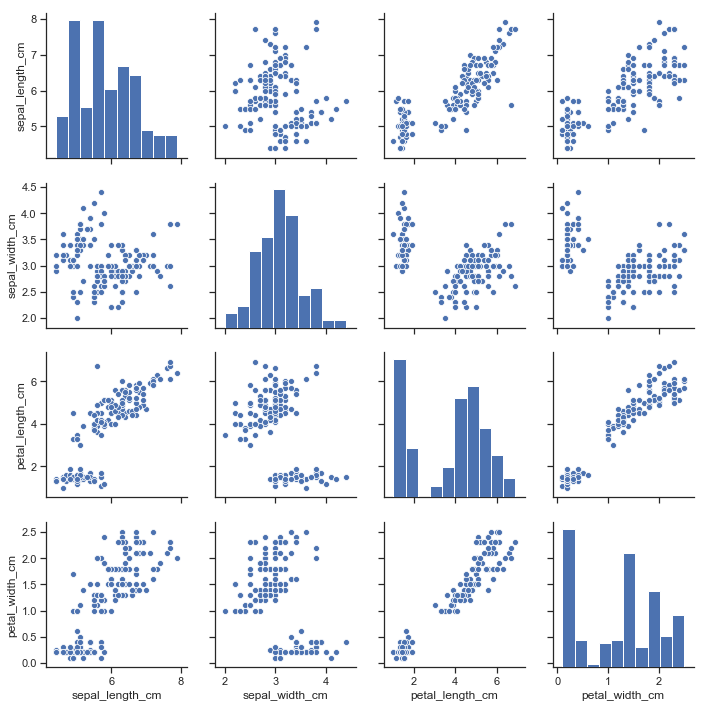

In [18]:
# 单色调
sns.pairplot(iris_data)

## 1.3 带标签的图

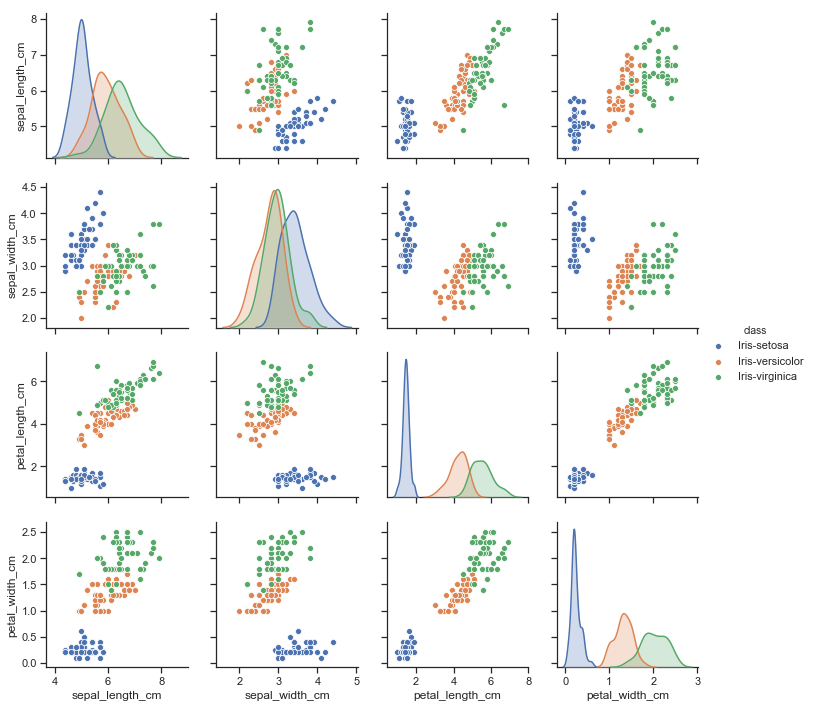

In [19]:
# 多色调
sns.pairplot(iris_data, hue='class')

## 1.4 设置色板

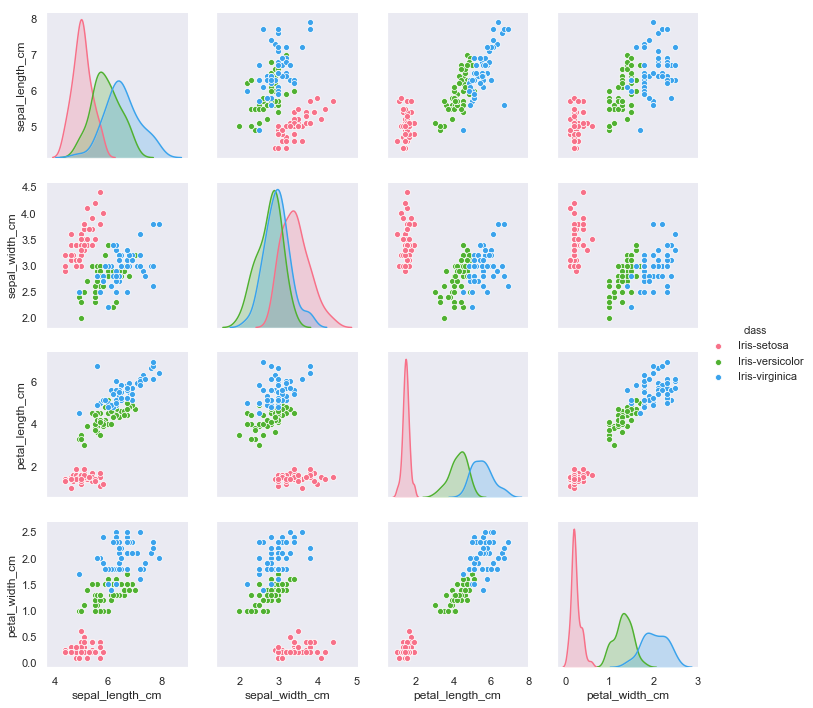

In [20]:
sns.set_style('dark')
sns.pairplot(iris_data, hue='class',
            palette='husl')

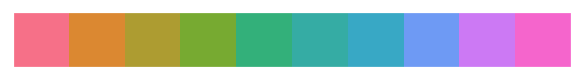

In [21]:
# husl 是一个色彩系统
# 取 10 个样本颜色展示
sns.palplot(sns.color_palette('husl',10))

## 1.5 设置标记

+ 风格设置成 darkdrid
+ 色板设置成 colorblind
+ 圆形(o), 正方形(s), 方块(D) 标记

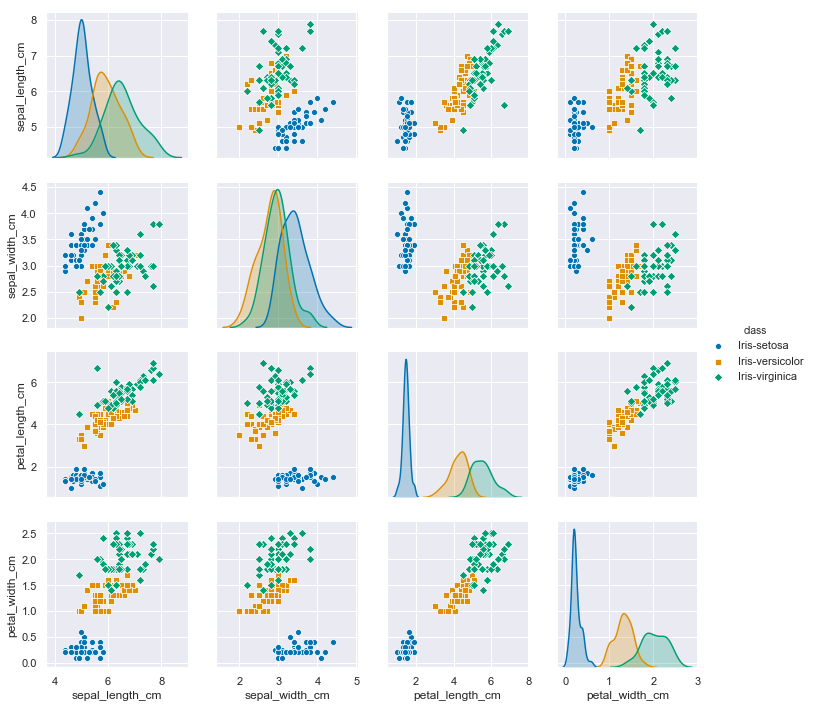

In [22]:
# 风格设置
sns.set_style('darkgrid')
# 色板设置
sns.set_palette('colorblind')
sns.pairplot(iris_data, hue='class', markers=['o','s','D'])

## 1.6 子集图

+ 风格设置成 whitegrid
+ 横轴和纵轴都赋予 **相同** 的子集变量

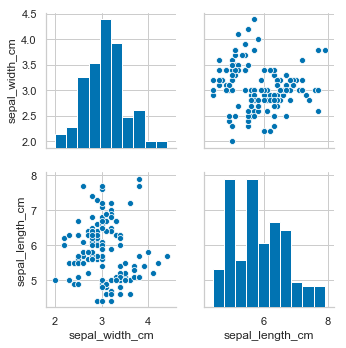

In [23]:
sns.set_style('whitegrid')
sns.pairplot(iris_data, vars=['sepal_width_cm',
                             'sepal_length_cm'])

赋予**不同**的子集变量

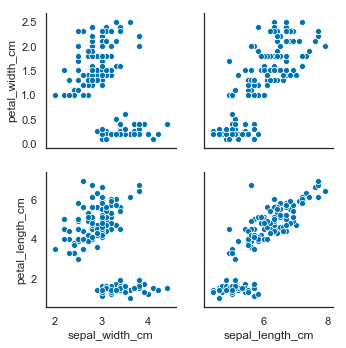

In [24]:
sns.set_style('white')
sns.pairplot(iris_data, 
             x_vars=['sepal_width_cm',
                               'sepal_length_cm'],
            y_vars=['petal_width_cm',
                   'petal_length_cm']
            )

## 1.7 线性回归图

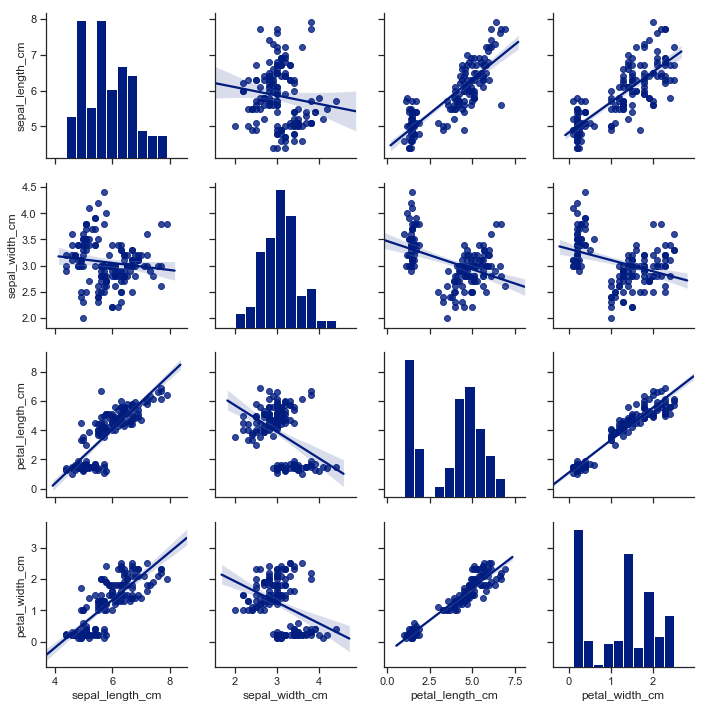

In [25]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(iris_data, kind='reg')

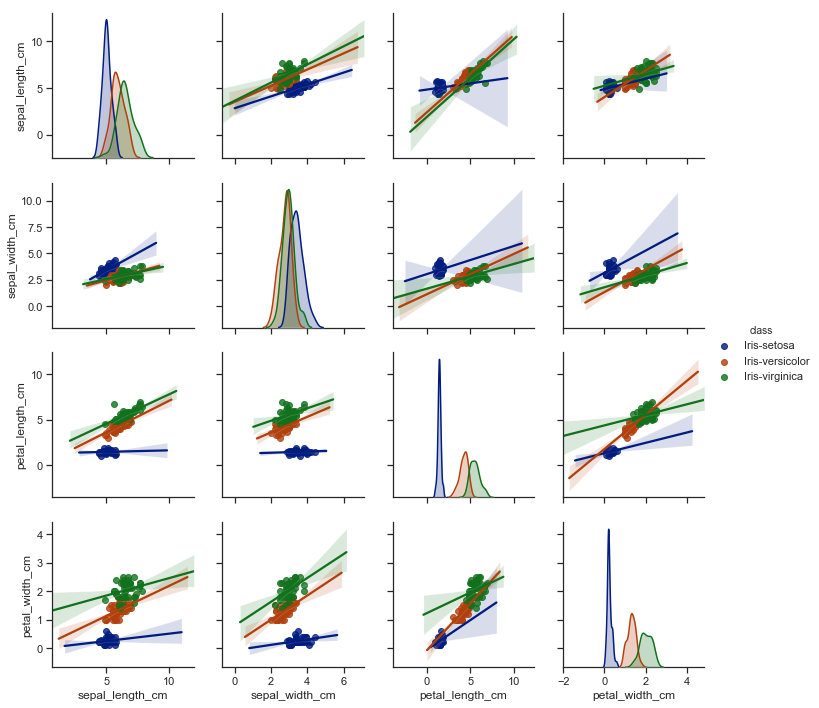

In [26]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(iris_data, kind='reg', hue='class')

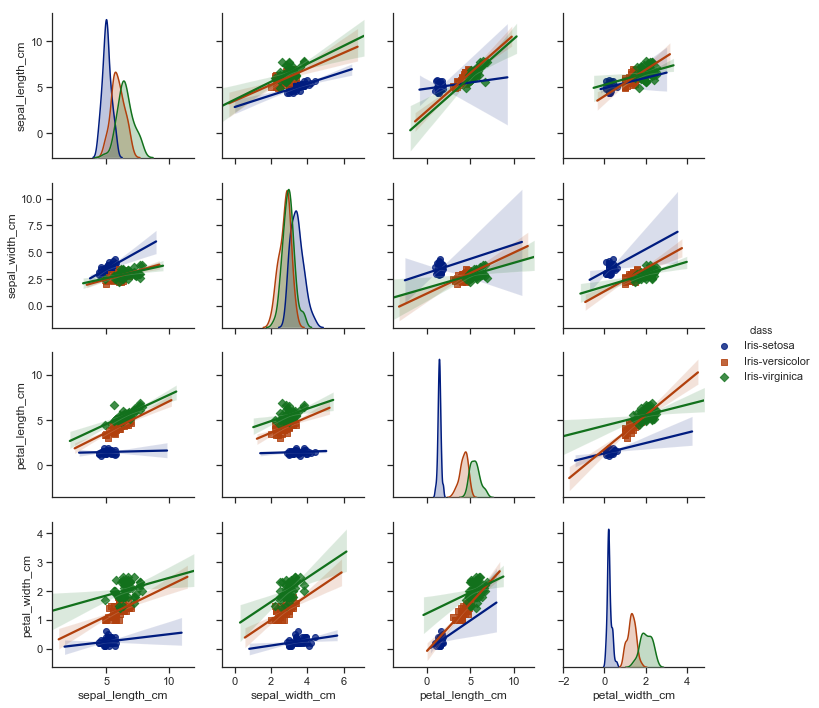

In [27]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(iris_data, kind='reg', hue='class', markers=['o','s','D'])

## 1.8 核密度图

在对角线上作核密度估计图 (KDE, kernel density estimation, 平滑数据时用到)

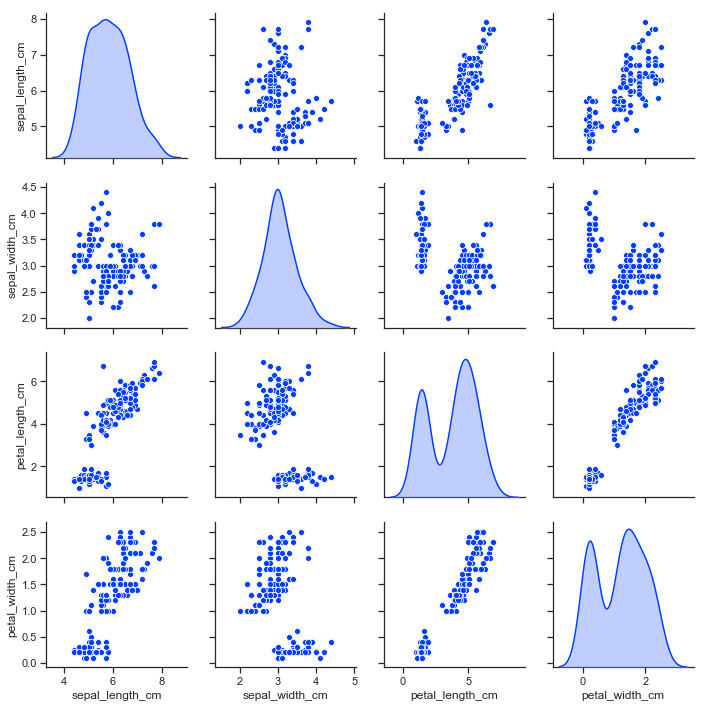

In [28]:
sns.set_palette('bright')
sns.pairplot(iris_data, diag_kind='kde')

# 2 广度了解 Seaborn

利用内置 Titantic 数据集展示
+ 条形图(barplot)
+ 计数图(countplot)
+ 点图(pointplot)
+ 箱形图(boxplot)
+ 小提琴图(violinplot)

用 Iris 数据展示
+ 箱形水平图(boxploth)
+ 双变量分布图(jointplot)

![变量说明](images/titanic_pic.png)

In [29]:
# 加载 Titanic 数据
titanic = sns.load_dataset('titanic')
titanic.head(3).append(titanic.tail(3))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


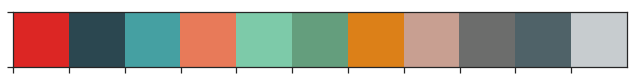

In [30]:
sns.set_palette(color)
sns.palplot(sns.color_palette(color, 11))

## 2.1 条形图

对男性和女性, 根据不同船舱, 统计各自的生还率, 并用颜色区分等级.

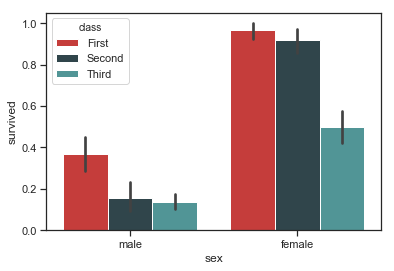

In [31]:
sns.barplot(x='sex',
            y='survived',
            hue='class',
            data=titanic)

## 2.2 计数图

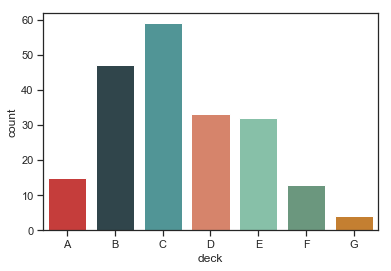

In [32]:
# 统计每层客舱里的人数
sns.countplot(x='deck', data=titanic)

## 2.3 点图

统计每等舱 (x='class') 不同性别 (hue='sex') 的生还率 (y='survived').

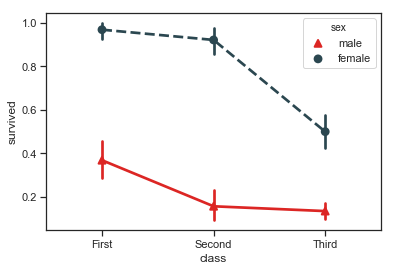

In [33]:
sns.pointplot(x='class',
             y='survived',
             hue='sex',
             data=titanic,
             markers=['^','o'],
             linestyles=['-','--'])

## 2.4 箱形图

统计在生化和死亡 (x='alive') 成年和未成年男性 (hue='adult_male') 的年龄分布 (y='age')

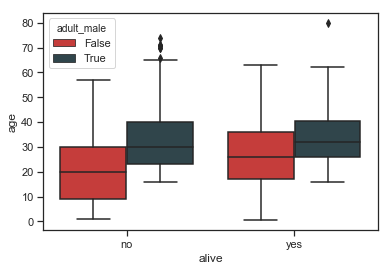

In [35]:
sns.boxplot(x='alive',
           y='age',
           hue='adult_male',
           data=titanic)

## 2.5 小提琴图

统计在男性和女性 (x='sex') 两类里生还率和死亡 (hue='survived') 的年龄分布 (y='age')

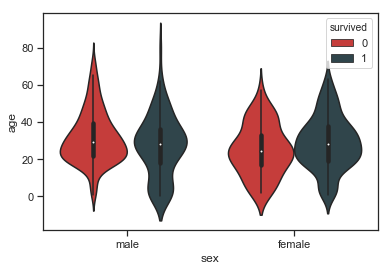

In [37]:
sns.violinplot(x='sex',
           y='age',
           hue='survived',
           data=titanic)

## 2.6 水平箱型图

画出萼片长度、萼片宽度、花瓣长度和花瓣宽度的箱型图

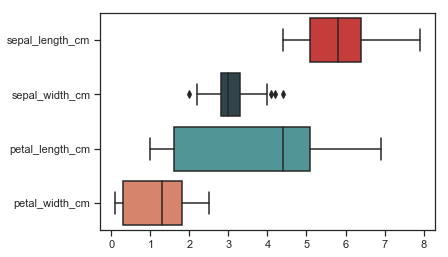

In [38]:
sns.boxplot(data=iris_data, orient='h')

## 2.7 双变量分布图

setting kind='kde' to plot the 1-distribution of sepal length and sepal width.

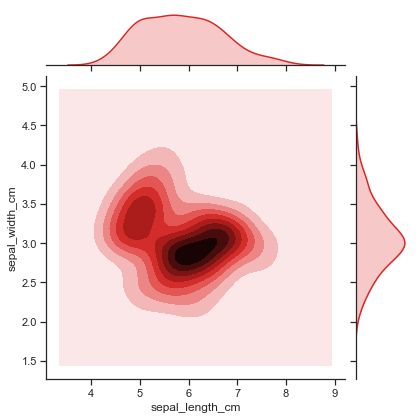

In [39]:
sns.jointplot('sepal_length_cm', 'sepal_width_cm',
             data=iris_data,
             kind='kde')

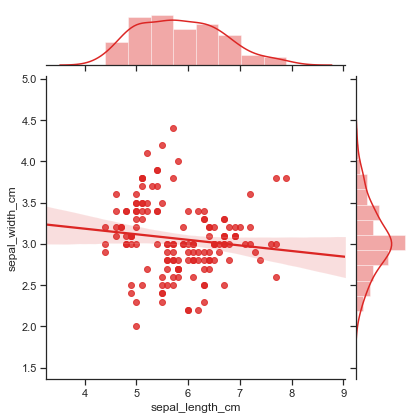

In [40]:
# 画出线性关系
sns.jointplot('sepal_length_cm', 'sepal_width_cm',
             data=iris_data,
             kind='reg')

# 3 总结

Seaborn advanced the Maplotlib. and the next is PyEcharts.